Spectra Tune Lab light engine
=============================

The Spectra Tune Lab (STLAB: [Ledmotive Technologies, LLC](https://ledmotive.com/)) is a spectrally tuneable light engine with 10 LED colour channels, capable of generating a broad range of spectral compositions. The device can be controlled programmatically with most languages using its *RESTFUL_API*, which takes commands via generic http requests. The API includes commands to set a specific spectrum, turn the light off, get readouts from the onboard spectrometer, etc. We chose to work with the STLAB because it offers a high level of control over the temporal and spectral properties of light stimuli. Interfacing with the device is managed by ***PyPlr***'s ***stlab.py*** module, which uses the Python requests library to wrap most of the RESTFUL_API, and which also includes other routines for working with the device. 

Introduction
------------

STLABs connects via ethernet to a small computer called the LIGHT_HUB (a BeagleBone running Linux), which in turn connects via USB to the controlling computer. When all hardware is correctly assembled and the appropriate software installed, establishing a connection to the device is easy: 


In [12]:
from pyplr import stlab
d = stlab.SpectraTuneLab(username='admin', identity=1, password='83e47941d9e930f6')

STLAB device setup complete...


With this handle on the device we can access the methods available from the RESTFUL_API. For example, to blink each of the LEDs in turn at max intensity for 1 second, we can use the ``.set_spectrum_a(...)`` method:

In [13]:
from time import sleep

for led in range(10):
    intensities = [0]*10
    intensities[led] = 4095
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(1.)

Note that spectrums are defined by passing a list of 10 values—one for each LED channel—between 0-4095 (12-bit resolution depth), corresponding to the minimum and maximum output of the device. 

STLAB also has an on-board spectrometer. Using the convenient user-defined ``.sample(...)`` method, we can turn on each light and obtain some measurements:

In [14]:
leds = [0,1,2,3,4,5,6,7,8,9]
intensity = [4095]
spectra, info = d.sample(leds=leds, intensities=intensity)
spectra

Sampling 10 leds at the following intensities: [4095]
Measurement: 1 / 10, LED: 0, intensity: 4095
Measurement: 2 / 10, LED: 1, intensity: 4095
Measurement: 3 / 10, LED: 2, intensity: 4095
Measurement: 4 / 10, LED: 3, intensity: 4095
Measurement: 5 / 10, LED: 4, intensity: 4095
Measurement: 6 / 10, LED: 5, intensity: 4095
Measurement: 7 / 10, LED: 6, intensity: 4095
Measurement: 8 / 10, LED: 7, intensity: 4095
Measurement: 9 / 10, LED: 8, intensity: 4095
Measurement: 10 / 10, LED: 9, intensity: 4095


,,380,385,390,395,400,405,410,415,420,425,...,735,740,745,750,755,760,765,770,775,780
led,intensity,,,,,,,,,,,,,,,,,,,,,
0,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004.972615,2837.923981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.546429,462.320051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.154347,15.241870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.554478,4.192380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.574092,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.919197,18.564373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.865724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, using the data that just collected, we can plot the spectral power distributions of the 10 channels at maximum and their CIE 1931 *xy* chromaticity coordinates, which define the gamut of the device. Note that we can calculate the *xy* chromaticity coordinates quickly by passing the output of ``.sample(...)`` (or a DataFrame with the same format) to ``stlab.spectra_to_xyz(...)``. 

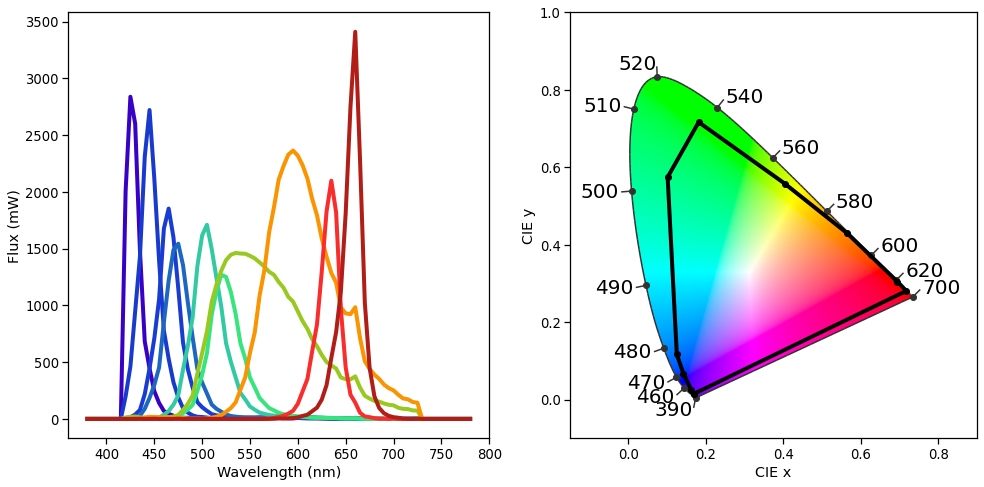

In [16]:
from colour.plotting import plot_chromaticity_diagram_CIE1931
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.2)

xyz = stlab.spectra_to_xyz(spectra, binwidth=5)
xyz = xyz.append(xyz.loc[0]) # join the dots
long_spectra = stlab.spectra_wide_to_long(spectra)

# set up figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# plot SPDs
sns.lineplot(x='wavelength', y='flux', data=long_spectra, hue="led", palette=d.rgb_colors, ax=ax1, lw=4, legend=False)
ax1.set_xlabel("Wavelength (nm)")
ax1.set_ylabel("Flux (mW)")

# plotting the *CIE xy* chromaticity coordinates.
plot_chromaticity_diagram_CIE1931(standalone=False, axes=ax2, title=False, show_spectral_locus=True)
ax2.set_xlim((-.15,.9))
ax2.set_ylim((-.1,1))
ax2.plot(xyz["X"], xyz["Y"], color='k', lw=4, marker='o', markersize=6)
for item in ax2.texts:
    item.set_fontsize(20)
f.tight_layout()

For a more nuanced understanding of the device's output we would need to sample at a range of intensities, such as from minimum to maximum in steps of 63:

```Python
leds = [0,1,2,3,4,5,6,7,8,9]
intensities = [val for val in range(0,4096,65)]
spectra, info = d.sample(leds=leds, intensity=intensities)
```

We will do this later using an OceanOptics VIS spectrometer in order to create a forward model of the device.

Device timing in synchronous mode
---------------------------------

The STLAB operates in ***synchronous*** mode by default, meaning that all commands sent by the LIGHT_HUB must be acknowledged before a new instruction can be processed. This enables 'collisions' between messages to be detected and corrected. According to the device manual, response times in the synchronous mode of operation are on the order of around 250 milliseconds. We can test this. 

Execution time summary:
count    400.000000
mean       0.125621
std        0.036022
min        0.105718
25%        0.119646
50%        0.122219
75%        0.124715
max        0.547319
dtype: float64


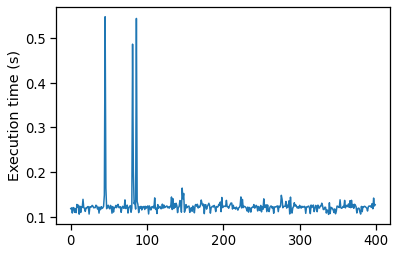

In [19]:
from time import time

on = [4095]*10
off = [0]*10
exec_times = []
for i in range(200):
    t1 = time()
    d.set_spectrum_a(on)
    t2 = time()
    sleep(.2)
    t3 = time()
    d.set_spectrum_a(off)
    t4 = time()
    exec_times.append(t2-t1)
    exec_times.append(t4-t3)
    
exec_times = pd.Series(exec_times)
print('Execution time summary:')
print(exec_times.describe())
ax = exec_times.plot()
ax.set_ylabel('Execution time (s)');

Clearly there is variability here. It probably depends on the machine, hardware, other processes, etc., but in our general testing we have seen even worse timings, with commands sometimes taking up to 5 s to execute. Given that we will want to administer light stimuli of a precise duration, the uncertainty here is problematic. Thankfully the STLAB has an ***asynchronous*** mode of operation which allows for real-time spectral streaming, with a spectral switching time of less than 10 milliseconds (i.e., 1 spectrum every 10 milliseconds). We leverage this mode in order to get the desired control over the temporal characteristics of our light stimuli. 

Using video files in asynchronous mode
--------------------------------------

Using the asynchronous mode requires the creation of ***dynamic sequence files***, which are essentially JSON files with a particular file structure and a .DSF extension. Our *stlab.py* module has some handy tools for creating video files. For example, we can create a 2-second pulse of bright red light using ``stlab.pulse_protocol(...)``:

In [29]:
spec = [0]*10
spec[-1] = 4095
vf_df = stlab.pulse_protocol(pulse_spec=spec,
                             pulse_duration=2000,
                             fname='1s_red_pulse',
                             return_df=True,
                             metadata={'whatever':'info',
                                       'you':'want'})
vf_df

"1s_red_pulse.dsf" saved in the current working directory.


,time,LED-1,LED-2,LED-3,LED-4,LED-5,LED-6,LED-7,LED-8,LED-9,LED-10
0,0,0,0,0,0,0,0,0,0,0,4095
1,2000,0,0,0,0,0,0,0,0,0,4095
2,2000,0,0,0,0,0,0,0,0,0,0
3,2100,0,0,0,0,0,0,0,0,0,0


To get a bit more insight into the structure of the video file, we can call ``stlab.video_file_to_dict(...)`` on the one we just created:

In [30]:
stlab.video_file_to_dict('1s_red_pulse.dsf')

{'header': {'version': 1,
  'model': 'VEGA10',
  'channels': 10,
  'spectracount': 4,
  'transitionsCount': 4,
  'fluxReference': 0,
  'repeats': 1},
 'metadata': {'creation_time': '2021-02-15 16:10:46.433666',
  'creator': 'jtm',
  'whatever': 'info',
  'you': 'want',
  'protocol': 'pulse',
  'pulse_spec': '[0, 0, 0, 0, 0, 0, 0, 0, 0, 4095]',
  'pulse_duration': '2000'},
 'spectra': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 4095],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 4095],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'transitions': [{'spectrum': 0, 'power': 100, 'time': 0, 'flags': 0},
  {'spectrum': 1, 'power': 100, 'time': 2000, 'flags': 0},
  {'spectrum': 2, 'power': 100, 'time': 2000, 'flags': 0},
  {'spectrum': 3, 'power': 100, 'time': 2100, 'flags': 0}]}

Here are some notes on video files based on communications with Ledmotive: 

**1. HEADER**
 - **"version"**, **"models"** and **"channels"** should not be changed, as they are the default settings for the STLAB. This all gets handled by the `stlab.make_video_file(...)` function.
 - **"repeats"** is set to 1 by default, meaning the video will not run endlessly. Setting "repeats" to 0 will cause the video to start again after it finishes and repeat endlessly. 
 - **"spectraCount"** is the number of different spectra used in the video. In this example we used 4 spectra (although only two were unique).
 - **"transitionsCount"** is the total number of transitions in the video. In this example there are 4 different transitions.
 - **"fluxReference"** is reserved for something else, and is fine like this.
 
**2. METADATA** 
 - This is optional and not needed for the video file to work, but it is a good place to store information about the video file. When the file is loaded during runtime this info can then be unpacked and included in any triggers sent to Pupil Capture. Some information is included by default, but any dict passed as \****metadata** to the functions for creating video files will be unpacked into the video file (e.g. {'color':'blue'}). 
 
**3. SPECTRA**
 - These are the values (between 0 and 4095) for each of the 10 channels. Spectra should be stored as a list of lists.
 
**4. TRANSITIONS**
 - **"spectrum"** looks at the index from the list of lists to pick up the proper spectrum. This is set based on the index of the DataFrame passed to `stlab.make_video_file(...)`.
 - **"power"** assigns the power of the spectrum - can leave this at 100.
 - **"time"** is the start of the current spectrum in milliseconds time since the start of video file playback. Here the 1st spectrum starts at t=0sec, the 2nd spectrum stats at t=3sec.
 - **"flags"** is set to 0 by default, and need not be changed.

Now that we have a video file, playing it is easy:

In [28]:
d.load_video_file('1s_red_pulse.dsf')
d.play_video_file()

video file loaded...
playing video file...


Bear in mind that ``stlab.pulse_protocol(...)`` is one of a few convenience functions that call an underlying ``stlab.make_video_file(...)`` function, which will turn any dataframe like the one returned above into a video file. Just make sure the column names are the same and that there is at least 10 ms between every consecutive value in the 'time' column (otherwise spectra may be dropped). So it is possible to get creative and produce all kinds of cool sequences.

Integrating sphere
------------------

When studying the pupillary light reflex, in addition to a light source, a suitable geometry is required. 

## **Forward model**
Using linear interpolation on these spectra we can create a lookup table to predict the spectral power distribution for each primary at all intensity levels between 0 and 4095. This can be thought of as a forward model of the device.

In [12]:
spectra = pd.read_csv("../../../data/stlab/10led_65intensity.csv", index_col=['led','intensity','wavelength'])
lkp_tbl = stlab.interp_spectra(spectra)
lkp_tbl.columns = wlbins
lkp_tbl

380.0  385.0  390.0  395.0  400.0  405.0  410.0  415.0  \
led intensity                                                           
0   0            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    1            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    2            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    3            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    4            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...              ...    ...    ...    ...    ...    ...    ...    ...   
9   4091         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    4092         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    4093         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    4094         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
    4095         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  420.0     425.0  ...  735.0  740.0  745.0  750.0  755.0  \
led intensity                      ...                                      
0   0          0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
    1          0.229296  0.398322  ...    0.0    0.0    0.0    0.0    0.0   
    2          0.458592  0.796645  ...    0.0    0.0    0.0    0.0    0.0   
    3          0.687888  1.194967  ...    0.0    0.0    0.0    0.0    0.0   
    4          0.917184  1.593289  ...    0.0    0.0    0.0    0.0    0.0   
...                 ...       ...  ...    ...    ...    ...    ...    ...   
9   4091       0.707791  0.049435  ...    0.0    0.0    0.0    0.0    0.0   
    4092       0.719787  0.037076  ...    0.0    0.0    0.0    0.0    0.0   
    4093       0.731783  0.024718  ...    0.0    0.0    0.0    0.0    0.0   
    4094       0.743780  0.012359  ...    0.0    0.0    0.0    0.0    0.0   
    4095       0.755776  0.000000  ...    0.0    0.0    0.0    0.0    0.0   

               760.0  765.0  770.0  775.0  780.0  
led intensity                                     
0   0            0.0    0.0    0.0    0.0    0.0  
    1            0.0    0.0    0.0    0.0    0.0  
    2            0.0    0.0    0.0    0.0    0.0  
    3            0.0    0.0    0.0    0.0    0.0  
    4            0.0    0.0    0.0    0.0    0.0  
...              ...    ...    ...    ...    ...  
9   4091         0.0    0.0    0.0    0.0    0.0  
    4092         0.0    0.0    0.0    0.0    0.0  
    4093         0.0    0.0    0.0    0.0    0.0  
    4094         0.0    0.0    0.0    0.0    0.0  
    4095         0.0    0.0    0.0    0.0    0.0  

[40960 rows x 81 columns]

Now we just need a function that, given some LED intensity settings and our lookup table, can predict the spectral output.

In [8]:
%pinfo2 stlab.predict_spd

Signature:
stlab.Device.predicted_spd(
    self,
    intensity=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    lkp_table=None,
)
Source:   
    def predicted_spd(self, intensity=[0,0,0,0,0,0,0,0,0,0], lkp_table=None):
        """
        Predict the spectral power distribution for a given list of led 
        intensities using linear interpolation.
    
        Parameters
        ----------
        intensity : list
            List of intensity values for each led. The default is [0,0,0,0,0,0,0,0,0,0].
        lkp_table : DataFrame
            A wide-format DataFrame with hierarchichal pd.MultIndex [led, intensity] 
            and a column for each of 81 5-nm wavelength bins. 4096*10 rows, containing
            predicted for each led at all possible intensities.
    
        Returns
        -------
        spectrum : np.array
            Predicted spectrum for given intensities.
        """
        spectrum = np.zeros(81)
        for led , val in enumerate(intensity):
            spectrum += lkp

If the STLAB is still connected, let's use our lookup table and `stlab.predicted_spd(...)` to predict the output for some random inputs and then compare this with a readout from the spectrometer. 

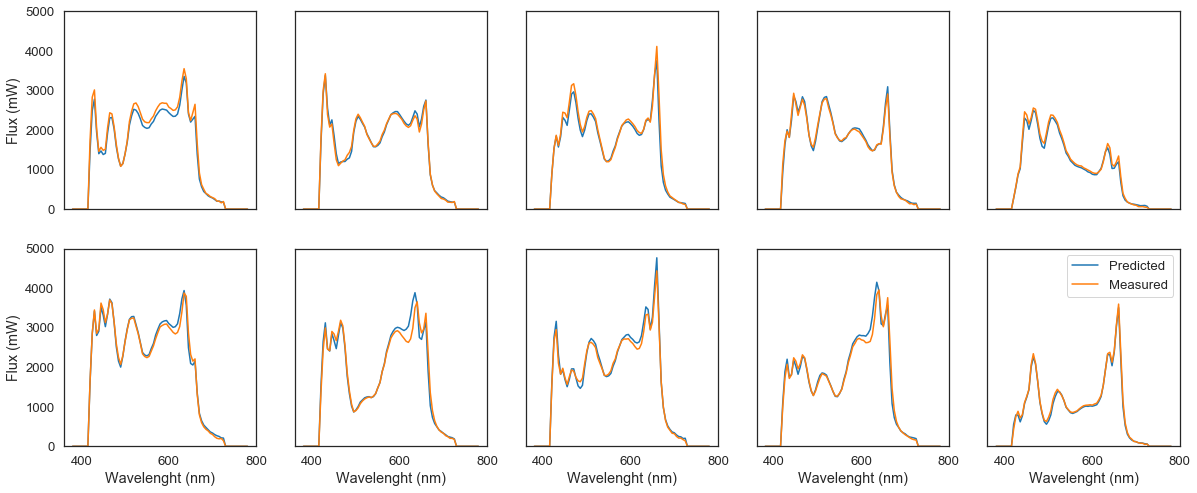

In [16]:
import random

# set up fgiure
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,8), sharey=True, sharex=True)
axs = [ax for sublist in axs for ax in sublist]

# predict, measure and plot for 8 random inputs
for ax in axs:
    random_input = [random.randrange(4096) for led in range(10)]
    predicted_spectrum = stlab.predict_spd(random_input, lkp_table=lkp_tbl)
    d.set_spectrum_a(random_input)
    measured_spectrum = d.get_spectrometer_spectrum(norm=False)
    d.turn_off()
    ax.plot(wlbins, predicted_spectrum, label="Predicted")
    ax.plot(wlbins, measured_spectrum, label='Measured')
    ax.set_ylim((0,5000))
    
for ax in [axs[0], axs[5]]:
    ax.set_ylabel("Flux (mW)")

for ax in axs[5:]:
    ax.set_xlabel("Wavelenght (nm)")

ax.legend()

Looks like the predictions are fairly accurate, but eventually it would be good to recreate this model with measurements taken from an external spectrometer looking into the integrating sphere. 

## **Device stability**
The manual for the STLAB claims perfect stability over time thanks to an on-board CMOS spectrophotometer and associated feedback loop control algorithms. But we can test this for ourselves:

```Python
leds = [0,1,2,3,4,5,6,7,8,9]
intensity = [4095]

df = pd.DataFrame()
for t in range(0,185,5):
    print("{} minutes left...".format(180-t))
    spectra = d.sample_leds(leds=leds, intensity=intensity, wait_before_sample=.5)
    spectra["time"] = t
    df = df.append(spectra)
    sleep(300)
df.to_csv("STLAB_stability.csv")
```
The above code samples each LED every (roughly) five minutes across 3 hours (36 measurements in total) and saves the results in a DataFrame. But to save time, let's just load some data generated by a previous run of this code. 

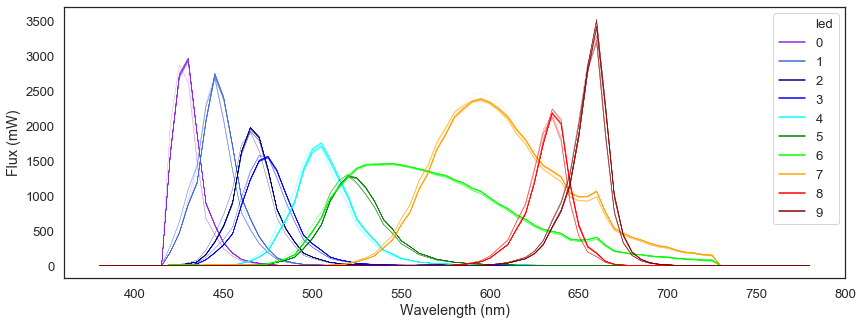

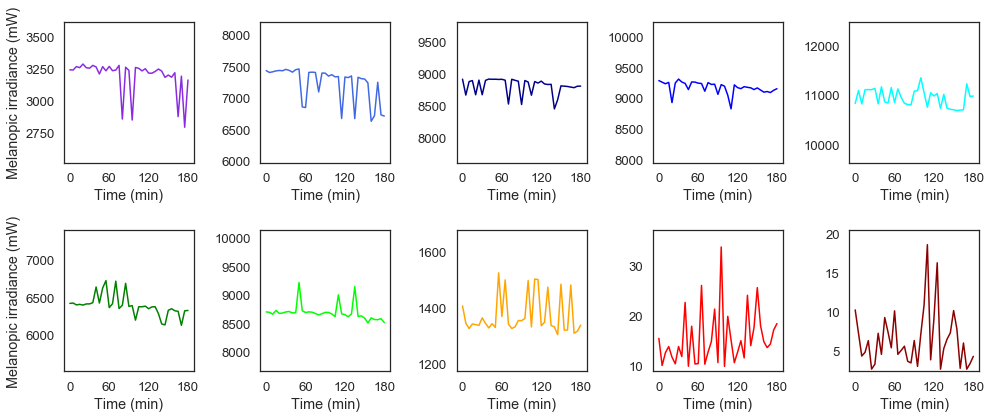

In [17]:
# load existing data
stability = pd.read_csv("../../../data/stlab/STLAB_3h_stability.csv")

# set up figure
fig, ax = plt.subplots(figsize=(14,5), sharex=True)

# plot SPDs
sns.lineplot(x='wavelength', y='flux', data=stability, hue='led', palette=colors, units='time', ax=ax, lw=.1, estimator=None)
ax.set_ylabel("Flux (mW)")
ax.set_xlabel("Wavelength (nm)")

# get max for led-cycle
maxs = stability.groupby(["led","time"])["flux"].max()

# plot
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14,6))
axs = [ax for sublist in axs for ax in sublist]

for led, ax in enumerate(axs):
    mis = stlab.spectra_to_melanopic_irradiance(stability, grouper=['led','time'])
    mis.loc[led].plot(ax=ax, c=colors[led])
    low, high = mis.loc[led].min() - mis.loc[led].min() * 0.1, mis.loc[led].max() + mis.loc[led].max() * 0.1
    ax.set_ylim((low, high))
    #maxs.loc[led].plot(ax=ax, c=colors[led])
    #low, high = maxs.loc[led].min() - maxs.loc[led].min() * 0.1, maxs.loc[led].max() + maxs.loc[led].max() * 0.1
    #ax.set_ylim((low, high))
    
for ax in [axs[0], axs[5]]:
    ax.set_ylabel("Melanopic irradiance (mW)")
    
for ax in axs:
    ax.set_xlabel("Time (min)")
    ax.set_xticks((0,60,120,180))
    
fig.tight_layout()

## **Timing in synchronous mode**
The STLAB operates in ***synchronous*** mode by default, meaning that all commands sent by the LIGHT HUB must be acknowledged before a new instruction can be processed. The manual claims that response times in this mode of operation are on the order of around 250 milliseconds. We can test this. 

count    400.000000
mean       0.119784
std        0.007681
min        0.102159
25%        0.116358
50%        0.119533
75%        0.122504
max        0.150041
dtype: float64


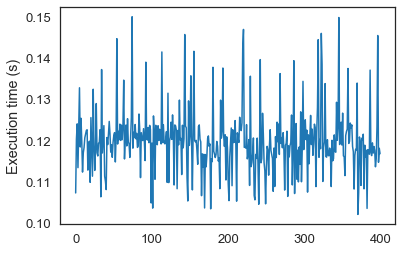

In [18]:
from time import time

spec = [4095]*10
off  = [0]*10
exec_times = []
for i in range(200):
    t1 = time()
    d.set_spectrum_a(spec)
    t2 = time()
    sleep(.2)
    t3 = time()
    d.set_spectrum_a(off)
    t4 = time()
    exec_times.append(t2-t1)
    exec_times.append(t4-t3)
    
exec_times = pd.Series(exec_times)
print(exec_times.describe())
ax = exec_times.plot()
ax.set_ylabel('Execution time (s)');

It probably depends on the machine, hardware, other processes, etc., but often we see worse timings, with commands sometimes taking up to 5 s to execute. Given that we may want to calculate (e.g.) accurate measures of pupil response times, the uncertainty here is problematic. Thankfully the STLAB also has an ***asynchronous*** mode of operation which allows for real-time spectral streaming with a spectral switching time of less than 10 milliseconds (i.e. 1 spectrum every 10 milliseconds). We will need to leverage this mode in order to get the desired control over the temporal properties of our light stimuli. 

## **Making video files to play in asynchronous mode**
For asynchronous mode we need to create video files, which are basically json files with a .dsf (dynamic sequence file) extension. Let's create a video file that sequentially ramps up each LED by 5 intensity steps every 10 ms. 

In [28]:
specs = []
t = 0
for led in range(10):
    for intensity in range(0, 4096, 5):
        spec = [0]*10
        spec[led] = intensity
        spec.insert(0, t)
        specs.append(spec)
        t += 10
specs = pd.DataFrame(specs)
cols = ["primary-" + str(val) for val in range(10)]
cols.insert(0, 'time')
specs.columns = cols
specs

,time,primary-0,primary-1,primary-2,primary-3,primary-4,primary-5,primary-6,primary-7,primary-8,primary-9
0,0,0,0,0,0,0,0,0,0,0,0
1,10,5,0,0,0,0,0,0,0,0,0
2,20,10,0,0,0,0,0,0,0,0,0
3,30,15,0,0,0,0,0,0,0,0,0
4,40,20,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8195,81950,0,0,0,0,0,0,0,0,0,4075
8196,81960,0,0,0,0,0,0,0,0,0,4080
8197,81970,0,0,0,0,0,0,0,0,0,4085
8198,81980,0,0,0,0,0,0,0,0,0,4090


We can use `stlab.make_video_file(...)` to turn any DataFrame with the above format into a video file playable by the STLAB. The following requirements must currently be met:

1. The DataFrame has columns (in this order): time, primary-0, primary-1, primary-2, primary-3, primary-4, primary-5, primary-6, primary-7, primary-8, primary-9
2. The intensity settings range between 0 - 4095
3. Consecutive values of time differ by at least 10 ms (the file will still play, but spectra will be skipped)


In [29]:
stlab.make_video_file(specs, "our_video_file");

Now we can load and play the video file using `Device.load_video_file(...)` and `Device.play_video_file(...)`. If we want to stop playback of the video file prematurely, we can say `Device.play_video_file(stop=True)`

In [36]:
# load the video file
d.load_video_file(video="our_video_file.dsf")

# start playing the video file
d.play_video_file()

# wait for 20 s and stop playback
sleep(20.)
d.play_video_file(stop=True)
sleep(2)

# turn off the light
d.turn_off()